In [ ]:
!pip install tqdm


In [ ]:
print("KDD-Section")

In [1]:
import pandas as pd
import os
from tqdm import tqdm

# Load the dataset
file_path = 'FlowStatsfile.csv'
print(f"reading {file_path}")
df = pd.read_csv(file_path)
print(f"Done reading{file_path}")





reading FlowStatsfile.csv
Done readingFlowStatsfile.csv


In [21]:
import pandas as pd
import os
from tqdm import tqdm

# Load the dataset
file_path = 'ddostrace.to-victim.20070804_140936_FlowStatsfile.csv'
print(f"reading {file_path}")
df1 = pd.read_csv(file_path)
print(f"Done reading{file_path}")

reading ddostrace.to-victim.20070804_140936_FlowStatsfile.csv
Done readingddostrace.to-victim.20070804_140936_FlowStatsfile.csv


In [2]:
storeddf = df

In [19]:
df = storeddf

In [28]:
df = df1


In [29]:
import pandas as pd
import os
from datetime import datetime, timedelta
from tqdm import tqdm

# Create the output directory if it doesn't exist
output_dir = 'splittedkdd'
os.makedirs(output_dir, exist_ok=True)

# # Read the CSV file
# print("Reading the CSV file...")
# df = pd.read_csv('flowstatfiles.csv', parse_dates=['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
# Sort the dataframe by timestamp
df = df.sort_values('timestamp')

# Get the start and end times
start_time = df['timestamp'].min()
end_time = df['timestamp'].max()

# Initialize variables
current_time = start_time
file_counter = 1

# Create a progress bar
total_seconds = int((end_time - start_time).total_seconds())
with tqdm(total=total_seconds, desc="Splitting data") as pbar:

    while current_time < end_time:
        # Calculate the end of the 2-second interval
        interval_end = current_time + timedelta(seconds=2)
        
        # Filter data for the current 2-second interval
        interval_data = df[(df['timestamp'] >= current_time) & (df['timestamp'] < interval_end)]
        
        if not interval_data.empty:
            # Generate filename
            filename = f"flow_data_{file_counter:04d}.csv"
            filepath = os.path.join(output_dir, filename)
            
            # Save the data to a new CSV file
            interval_data.to_csv(filepath, index=False)
            print(f"Saved {filename} with {len(interval_data)} records")
            
            file_counter += 1
        
        # Move to the next interval
        current_time = interval_end
        pbar.update(2)

print(f"Splitting complete. {file_counter - 1} files created in the '{output_dir}' directory.")

Splitting data:  41%|██████████████████████████████▌                                            | 122/299 [00:01<00:01, 158.72it/s]

Saved flow_data_0001.csv with 24 records
Saved flow_data_0002.csv with 11 records
Saved flow_data_0003.csv with 11 records
Saved flow_data_0004.csv with 22 records
Saved flow_data_0005.csv with 19 records
Saved flow_data_0006.csv with 12 records
Saved flow_data_0007.csv with 60 records
Saved flow_data_0008.csv with 1 records
Saved flow_data_0009.csv with 28 records
Saved flow_data_0010.csv with 14 records
Saved flow_data_0011.csv with 1 records
Saved flow_data_0012.csv with 13 records
Saved flow_data_0013.csv with 12 records
Saved flow_data_0014.csv with 12 records
Saved flow_data_0015.csv with 1 records
Saved flow_data_0016.csv with 51 records
Saved flow_data_0017.csv with 6 records
Saved flow_data_0018.csv with 12 records
Saved flow_data_0019.csv with 7 records
Saved flow_data_0020.csv with 1 records
Saved flow_data_0021.csv with 7 records
Saved flow_data_0022.csv with 1 records
Saved flow_data_0023.csv with 1 records
Saved flow_data_0024.csv with 11 records
Saved flow_data_0025.csv 

Splitting data:  68%|███████████████████████████████████████████████████▏                       | 204/299 [00:01<00:00, 262.40it/s]

Saved flow_data_0032.csv with 10 records
Saved flow_data_0033.csv with 15 records
Saved flow_data_0034.csv with 1 records
Saved flow_data_0035.csv with 12 records
Saved flow_data_0036.csv with 10 records
Saved flow_data_0037.csv with 50 records
Saved flow_data_0038.csv with 1 records
Saved flow_data_0039.csv with 73 records
Saved flow_data_0040.csv with 1 records
Saved flow_data_0041.csv with 74 records
Saved flow_data_0042.csv with 2 records
Saved flow_data_0043.csv with 48 records
Saved flow_data_0044.csv with 28 records
Saved flow_data_0045.csv with 52 records
Saved flow_data_0046.csv with 21 records


Splitting data: 300it [00:01, 162.05it/s]                                                                                          

Saved flow_data_0047.csv with 53 records
Saved flow_data_0048.csv with 22 records
Saved flow_data_0049.csv with 53 records
Saved flow_data_0050.csv with 22 records
Saved flow_data_0051.csv with 9 records
Splitting complete. 51 files created in the 'splittedkdd' directory.


In [30]:
!pip install scapy matplotlib


In [33]:
import matplotlib.pyplot as plt
from scapy.all import *

def plot_packet_flow(pcap_file):
    packets = rdpcap(pcap_file)  # Read pcap file
    times = []
    sizes = []
    
    # Extract timestamps and packet sizes
    for pkt in packets:
        if IP in pkt:  # Example: Filter only IP packets
            times.append(pkt.time)
            sizes.append(len(pkt))
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.scatter(times, sizes, color='b', marker='o', s=5, label='Packet Size')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Packet Size')
    plt.title('Packet Flow Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:


# Replace 'your_pcap_file.pcap' with the path to your pcap file
plot_packet_flow('ddostrace.to-victim.20070804_145436.pcap')


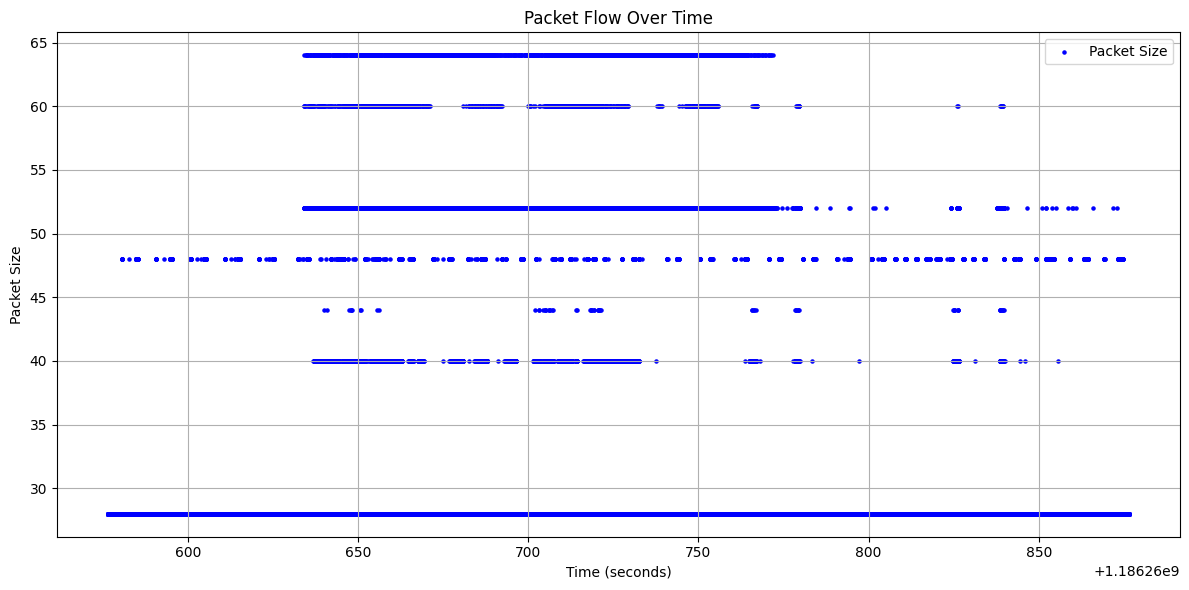

In [34]:
plot_packet_flow('smlddostrace.to-victim.20070804_134936.pcap')
